Scipy example
===

Here we will perform a variation of the fit example using Scipy.

In [55]:
# This code example below was generated by Claude-3.5.
import numpy as np

def generate_random_data(pdf, x_range, num_samples=1000, num_bins=1000):
    """
    Generate random data using an arbitrary positive definite function as PDF.
    
    Parameters:
    pdf (callable): The probability density function
    x_range (tuple): The range of x values (min_x, max_x)
    num_samples (int): Number of samples to generate
    num_bins (int): Number of bins for discretization
    
    Returns:
    numpy.ndarray: Array of generated random data
    """
    
    min_x, max_x = x_range
    x = np.linspace(min_x, max_x, num_bins)
    y = pdf(x)
    
    # Ensure the function is non-negative
    if np.any(y < 0):
        raise ValueError("The input function must be non-negative in the given range")
    
    # Normalize the function to make it a valid PDF
    y_normalized = y / np.trapz(y, x)
    
    # Find the maximum value of the normalized PDF
    y_max = np.max(y_normalized)
    
    # Generate random samples using rejection sampling
    samples = []
    while len(samples) < num_samples:
        x_proposed = np.random.uniform(min_x, max_x)
        y_proposed = np.random.uniform(0, y_max)
        
        if y_proposed < pdf(x_proposed) / np.trapz(y, x): # notice how the AI includes this inefficiency
            samples.append(x_proposed)                    # can you speed this code up in the 2nd cell below?
    
    return np.array(samples)

In [61]:
# a function with three parameters
def sample_pdf(x, p0=0.5, p1=2, p2=25, p3=.1):
        return p0 * np.exp(-(x - p1)**2 / 0.5) + x*x/p2 + p3

In [62]:
%%timeit
data = generate_random_data(sample_pdf, (-5, 5), num_samples=10000)
# comment out this cell to go faster 

299 ms ± 14.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


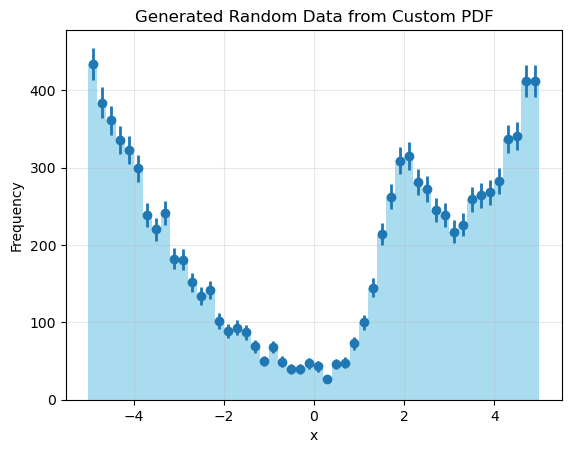

In [76]:
# back to the main project
import matplotlib.pyplot as plt

xrange=(-5,5)
nbins=50
data = generate_random_data(sample_pdf, xrange, num_samples=10000)
y,bins=np.histogram(data, bins=nbins, range=xrange)
yerr=np.sqrt(y)
x=(bins[:-1]+bins[1:])/2

plt.hist(data, bins=nbins, density=False, alpha=0.7, color='skyblue')

plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Generated Random Data from Custom PDF')
plt.errorbar(x, y, yerr, fmt='o', linewidth=2)
plt.grid(True, alpha=0.3)
plt.show()

For you to try
===
The file datadist.root you will find a histogram representing data from an unknown distribution.

* Develop your own fitting function/model and see how well you can fit this distribution. 
* You may need to try a variety of functions.
* Include a plot of your best fit at the bottom of this notebook.
* Include your p-value for the best fit and describe how you settled on this fit versus others. 

For this notebook it is assumed that you'll woth with scipy.optimize.curve_fit.  Below, we'll first conver the ROOT instogram into numpy arrays.

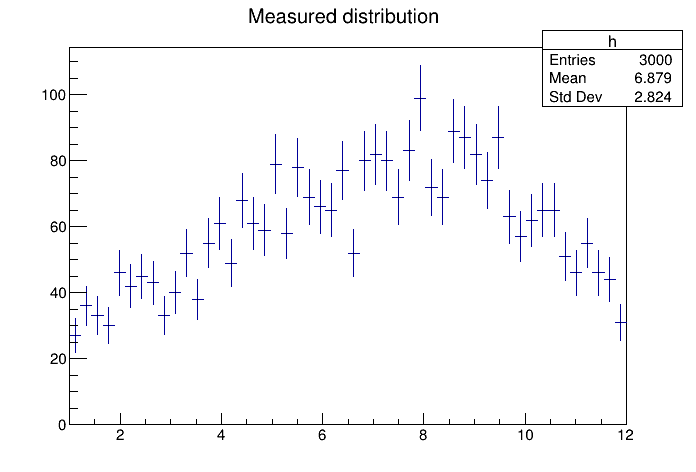

In [78]:
tf=r.TFile("datadist.root")
hist=tf.Get("h")
tc=r.TCanvas()
hist.Draw()
tc.Draw()

In [79]:
# a basic function to convert ROOT histograms into numpy arrays
def hist2np(h):
    nbin=h.GetNbinsX()
    x=np.zeros(nbin)
    y=np.zeros(nbin)
    ey=np.zeros(nbin)
    for i in range(1,nbin+1):  # bin index is 1..N
        x[i-1]=h.GetBinCenter(i)
        y[i-1]=h.GetBinContent(i)
        ey[i-1]=h.GetBinError(i)
    return x,y,ey

<ErrorbarContainer object of 3 artists>

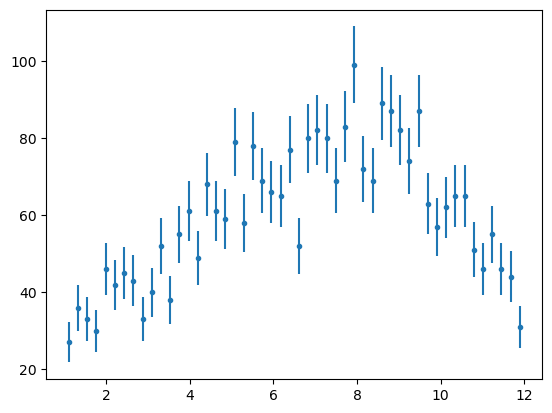

In [80]:
# Plot the histogram data with error bars
x,y,yerr = hist2np(hist)

plt.errorbar(x, y, yerr=yerr, fmt='.')